In [9]:
import numpy as np
import cv2
import os
import csv

# Function to load nose coordinates from file
def load_coordinates(file):
    coordinates = []
    with open(file, 'r') as f:
        next(f)
        next(f)
        for line in f:
            data = line.split()
            coordinates.append([data[0], int(data[1]), int(data[2]), int(data[3]), int(data[4])]) # Extracting nose coordinates
    return coordinates

def crop_eyes(coordinates, size=(18, 12)):
    cropped_lefteyes = []
    cropped_righteyes = []
    j=0
    directory_files = "/home/constanza/tfg/TFG/thesis/img_align_celeba"
    for coord in coordinates:
        if int(coord[0].split('.')[0])>= 182638:
            full_path = os.path.join(directory_files, coord[0])
            face_image = cv2.imread(full_path)
            le_x, le_y, re_x, re_y = coord[1], coord[2],coord[3], coord[4]             
            cropped_lefteye = face_image[le_y - size[1]//2:le_y + size[1]//2, le_x - size[0]//2:le_x + size[0]//2]
            cropped_lefteyes.append(cropped_lefteye)
            cropped_righteye = face_image[re_y - size[1]//2:re_y + size[1]//2, re_x - size[0]//2:re_x + size[0]//2]
            cropped_righteyes.append(cropped_righteye)
    return (cropped_lefteyes, cropped_righteyes)


In [4]:
archive = "list_landmarks_align_celeba.txt"
coord = load_coordinates(archive)
cropped_lefteyes, cropped_righteyes = crop_eyes(coord)
mean_le = np.mean(cropped_lefteyes, axis=0)
mean_re = np.mean(cropped_righteyes, axis=0)
mean_le_uint8 = mean_le.astype(np.uint8)
mean_re_uint8 = mean_re.astype(np.uint8)

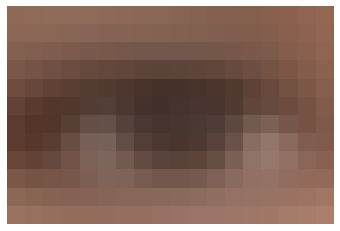

In [5]:
import matplotlib.pyplot as plt
imagen_rgb = cv2.cvtColor(mean_le_uint8, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_rgb.astype(np.uint8))
plt.axis('off')  # Hide axis
plt.show()

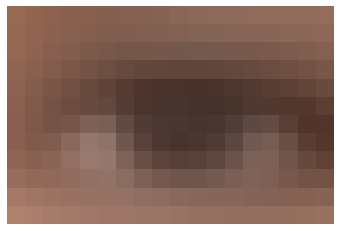

In [6]:
imagen_rgb = cv2.cvtColor(mean_re_uint8, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_rgb.astype(np.uint8))
plt.axis('off')  # Para ocultar los ejes
plt.show()

In [10]:
def replace_eyes(coordinates, delta, size=(18, 12)):
    altered_noses = []
    j=0
    directory_files = "/home/constanza/tfg/TFG/thesis/img_align_celeba"
    output_directory = "/home/constanza/tfg/TFG/thesis/eyes_08"
            
    with open('parsed_files/celeba-att-female-test.csv', 'r') as file:
        lines = csv.reader(file)
        female = []
        next(lines)
        for line in lines:
            img_id = line[0]
            female.append(img_id)         
    with open('parsed_files/celeba-att-male-test.csv', 'r') as file:
        lines = csv.reader(file)
        male = []
        next(lines)
        for line in lines:
            img_id = line[0]
            male.append(img_id)
    for coord in coordinates:
        img_id = coord[0] 
        if int(img_id.split('.')[0]) >= 182638 and (img_id in male):
            full_path = os.path.join(directory_files, img_id)
            face_image = cv2.imread(full_path)
            le_x, le_y, re_x, re_y = coord[1], coord[2],coord[3], coord[4]             
            cropped_lefteye = face_image[le_y - size[1]//2:le_y + size[1]//2, le_x - size[0]//2:le_x + size[0]//2]
            face_image[le_y - size[1]//2:le_y + size[1]//2, le_x - size[0]//2:le_x + size[0]//2] = mean_le_uint8*delta + cropped_lefteye*(1-delta) 
            cropped_righteye = face_image[re_y - size[1]//2:re_y + size[1]//2, re_x - size[0]//2:re_x + size[0]//2]
            face_image[re_y - size[1]//2:re_y + size[1]//2, re_x - size[0]//2:re_x + size[0]//2] = mean_re_uint8*delta + cropped_righteye*(1-delta) 
            output_path = os.path.join(output_directory, img_id)
            cv2.imwrite(output_path, face_image)
        if int(img_id.split('.')[0]) >= 182638 and (img_id in female):
            full_path = os.path.join(directory_files, img_id)
            face_image = cv2.imread(full_path)
            output_path = os.path.join(output_directory, img_id)
            cv2.imwrite(output_path, face_image)
            


In [23]:
replace_eyes(coord,1)

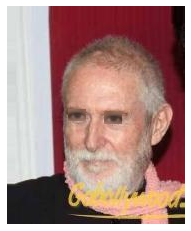

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/home/constanza/tfg/TFG/thesis/eyes_08/183049.jpg')
plt.imshow(img)
plt.axis('off') 
plt.show()